## Atividade 4 Matheus Inácio Silva Mol

Baseado na tarefa da semana passada (https://ava.cefor.ifes.edu.br/mod/assign/view.php?id=1575425).

Em um jupyter notebook:

    1. Carregue uma base de dados de classificação (binária ou multiclasse, mas não multirrótulo) que NÃO esteja nos toy datasets do scikit-learn;
    2. Treine um modelo da classe LogisticRegression do scikit-learn com toda a base;
    3. Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado;
    4. Plote 3 gráficos (2D) o MSE em função do atributo intercept_ da classe LogisticRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta.
        41. Diferentemente da tarefa de regressão, o gráfico do erro da classificação, muito provavelmente, não terá a aparência "bem comportada" que o gráfico do erro da regressão teve. Por isso, você precisará encontrar 3 deltas (um para cada gráfico). Cada delta provavelmente apresentará uma impressão diferente do comportamento da função de erro.
        42. O atributo intercept_ da classe LogisticRegression é um array que guarda o valor de interceptação de cada classe do problema da base de dados. Portanto, será necessário fazer 3 gráficos para cada valor do intercept_. Exemplo: problema com 3 classes, 9 gráficos.
    5. Suba seu jupyter notebook para o GitHub e disponibilize o link da tarefa (não do repositório).

### Bibliotecas

In [138]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

### Importando Base de dados

In [139]:
#Carregar os dados
df = pd.read_csv('C:\Github - Repositórios\REPA\Classificação/b_depressed.csv')

df.shape

(1429, 23)

In [140]:
df.keys()

Index(['Survey_id', 'Ville_id', 'sex', 'Age', 'Married', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

In [141]:
"""for d in df.keys():
    #print(df[t].values)
    for t in df.keys():
        X = df[d].values # Valores para X correspondem a Temperatura
        y = df[t].values # Valores para y correspondem a Temperatura aparente
        
        plt.xlabel(f"Data: {d}")
        plt.ylabel(f"Target: {t}")
        plt.scatter(X,y)
        plt.show()"""

'for d in df.keys():\n    #print(df[t].values)\n    for t in df.keys():\n        X = df[d].values # Valores para X correspondem a Temperatura\n        y = df[t].values # Valores para y correspondem a Temperatura aparente\n        \n        plt.xlabel(f"Data: {d}")\n        plt.ylabel(f"Target: {t}")\n        plt.scatter(X,y)\n        plt.show()'

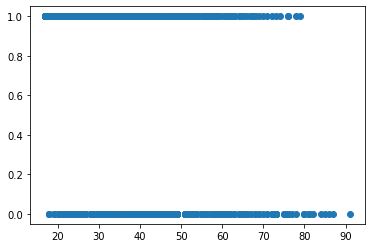

In [142]:
X = df["Age"].values # Valores para X correspondem a Temperatura
y = df["Married"].values # Valores para y correspondem a Temperatura aparente

plt.scatter(X,y)
plt.show()

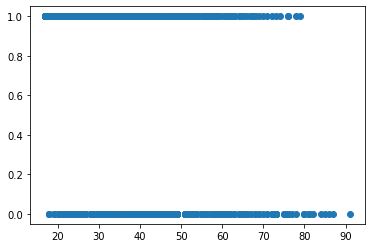

In [143]:
X2 = X.reshape(-1,1)
y2 = y.reshape(-1,1)

plt.scatter(X2, y2) # Pega todas as linhas da coluna 0 ()
plt.show()

### Classificação Regressão Logística

In [144]:
modelo = LogisticRegression()
modelo.fit(X2,y2)

C:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### Gerando Gráficos

In [145]:
DELTA = [1, 4, 10]
ITERAÇÕES = 30
INTERCEPT = modelo.intercept_

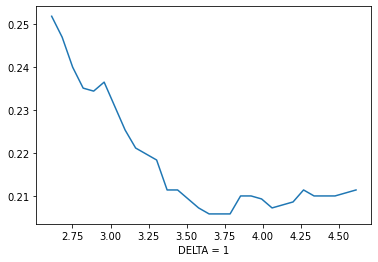

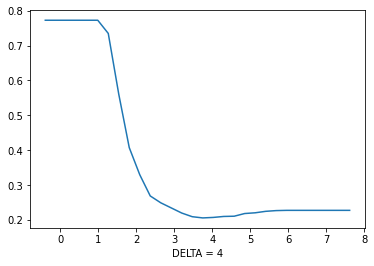

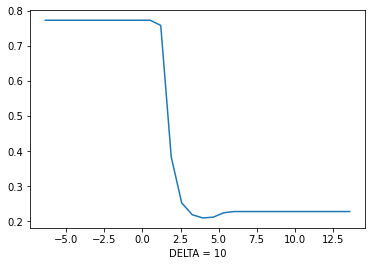

In [146]:
for k in DELTA:

    delta = k

    lista_intersept = np.linspace(INTERCEPT+delta, INTERCEPT-delta, ITERAÇÕES)
    lista_intersept

    lista_mse = []

    for v in range(ITERAÇÕES):
        modelo.intercept_ = lista_intersept[v]
        ypred = modelo.predict(X2)
        mse = mean_squared_error(y, ypred)
        lista_mse.append(mse)

    #print(lista_mse)

    plt.plot(lista_intersept,lista_mse)
    plt.xlabel(f"DELTA = {k}")
    plt.show()